In [4]:
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import numpy as np
import os

In [2]:
def load_all_csv_files(data_dir='data'):
    dataframes = {}
    
    # Get all CSV files in the directory
    csv_files = [f for f in os.listdir(data_dir) if f.endswith('.csv')]
    
    # Read each CSV file
    for csv_file in csv_files:
        file_path = os.path.join(data_dir, csv_file)
        # Use filename without extension as dictionary key
        file_key = csv_file.replace('.csv', '')
        dataframes[file_key] = pd.read_csv(file_path)
        print(f"Loaded {csv_file}: {dataframes[file_key].shape[0]} rows, {dataframes[file_key].shape[1]} columns")
    
    return dataframes

In [5]:
dfs = load_all_csv_files('data')

Loaded Assamese_songs.csv: 724 rows, 19 columns
Loaded Bengali_songs.csv: 958 rows, 19 columns
Loaded Bhojpuri_songs.csv: 519 rows, 19 columns
Loaded Gujarati_songs.csv: 2115 rows, 19 columns
Loaded Haryanvi_songs.csv: 228 rows, 19 columns
Loaded Hindi_songs.csv: 1184 rows, 19 columns
Loaded Kannada_songs.csv: 3559 rows, 19 columns
Loaded Malayalam_songs.csv: 479 rows, 19 columns
Loaded Marathi_songs.csv: 4699 rows, 19 columns
Loaded Odia_songs.csv: 940 rows, 19 columns
Loaded Old_songs.csv: 2448 rows, 19 columns
Loaded Punjabi_songs.csv: 3818 rows, 19 columns
Loaded Rajasthani_songs.csv: 541 rows, 19 columns
Loaded spotify_data clean.csv: 8582 rows, 15 columns
Loaded Tamil_songs.csv: 4677 rows, 19 columns
Loaded Telugu_songs.csv: 4996 rows, 19 columns
Loaded Urdu_songs.csv: 3116 rows, 19 columns


In [9]:
# Top Artists per language
language_dfs = {k: v for k, v in dfs.items() if k not in ['spotify_data clean', 'Old_songs']}
language_dfs = dict(sorted(language_dfs.items()))

{'Assamese_songs':                    song_name                     singer  \
 0              Namore Kothia  Bhupen Hazarika|Anju Devi   
 1                 Jai A Kanu             Khagen Mahanta   
 2              Tuamaki Roana              sibcharan das   
 3    Surat Magan Bhayal Rati           Jayanta Hazarika   
 4          Buku Ham Ham Kore            Bhupen Hazarika   
 ..                       ...                        ...   
 719               Hari Herre              Sadar Mahanta   
 720           Narayan Ke Gun         Late Maniram Gayon   
 721            Kamal Nayanke                  Naren Das   
 722              Gopal Chale                   Bani Das   
 723        Madhab Aru Kayali       Late Dayal Sutradhar   
 
                                           singer_id duration  language  \
 0    /artist/dr-bhupen-hazarika-2|/artist/anju-devi    07:11  Assamese   
 1                            /artist/khagen-mahanta    04:41  Assamese   
 2                             /art

In [27]:
top_n = 3  # adjust as needed

rows = []
for lang, df in language_dfs.items():
    artist_col = _get_artist_col(df)
    if 'popularity' not in df.columns:
        raise ValueError(f"'popularity' column not found for {lang}")

    artist_rank = (
        df[[artist_col, 'popularity']]
        .dropna()
        .groupby(artist_col, as_index=False)['popularity']
        .sum()
        .sort_values('popularity', ascending=False)
        .head(top_n)
        .assign(language=lang)
        .rename(columns={artist_col: 'artist'})
    )
    rows.append(artist_rank)

rank_df = pd.concat(rows, ignore_index=True)

# Pivot to wide format for stacked barh
pivot_df = rank_df.pivot(index='language', columns='artist', values='popularity').fillna(0)

# Optional: sort languages by total popularity
pivot_df = pivot_df.loc[pivot_df.sum(axis=1).sort_values(ascending=False).index]
pivot_df

artist,Akshaya Mohanty,Anuradha Paudwal,Asha Bhosle,Bhupen Hazarika,Dilraj Kaur,Dwipen Baruah,Ghulam Ali,Hemant Chauhan,K J Yesudas,Kaluram Prajapati,...,Rajesh Madina|Anuja,Rameshwar Pathak,Rehana Mirza,S. Janaki,S. P. Balasubrahmanyam,S. P. Balasubrahmanyam|P. Susheela,Safdarjung Rana|Uma Dubey,Sharda Sinha,T.M. Soundararajan,Usha Mangeshkar
language,,,,,,,,,,,,,,,,,,,,,
Telugu_songs,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,33490.0,37764.0,0.0,0.0,0.0,0.0
Tamil_songs,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,18340.0,0.0,0.0,0.0,25117.0,0.0
Kannada_songs,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,20090.0,20886.0,0.0,0.0,0.0,0.0,0.0
Marathi_songs,0.0,0.0,27774.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13224.0
Punjabi_songs,0.0,0.0,6893.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Hindi_songs,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Urdu_songs,0.0,0.0,0.0,0.0,0.0,0.0,6180.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gujarati_songs,0.0,0.0,7019.0,0.0,0.0,0.0,0.0,6336.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Malayalam_songs,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11538.0,0.0,...,0.0,0.0,0.0,3894.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
ax = pivot_df.plot(kind='barh', stacked=True, figsize=(14, 8), colormap='viridis')
ax.set_title('Top Artists per Language (by Popularity)')

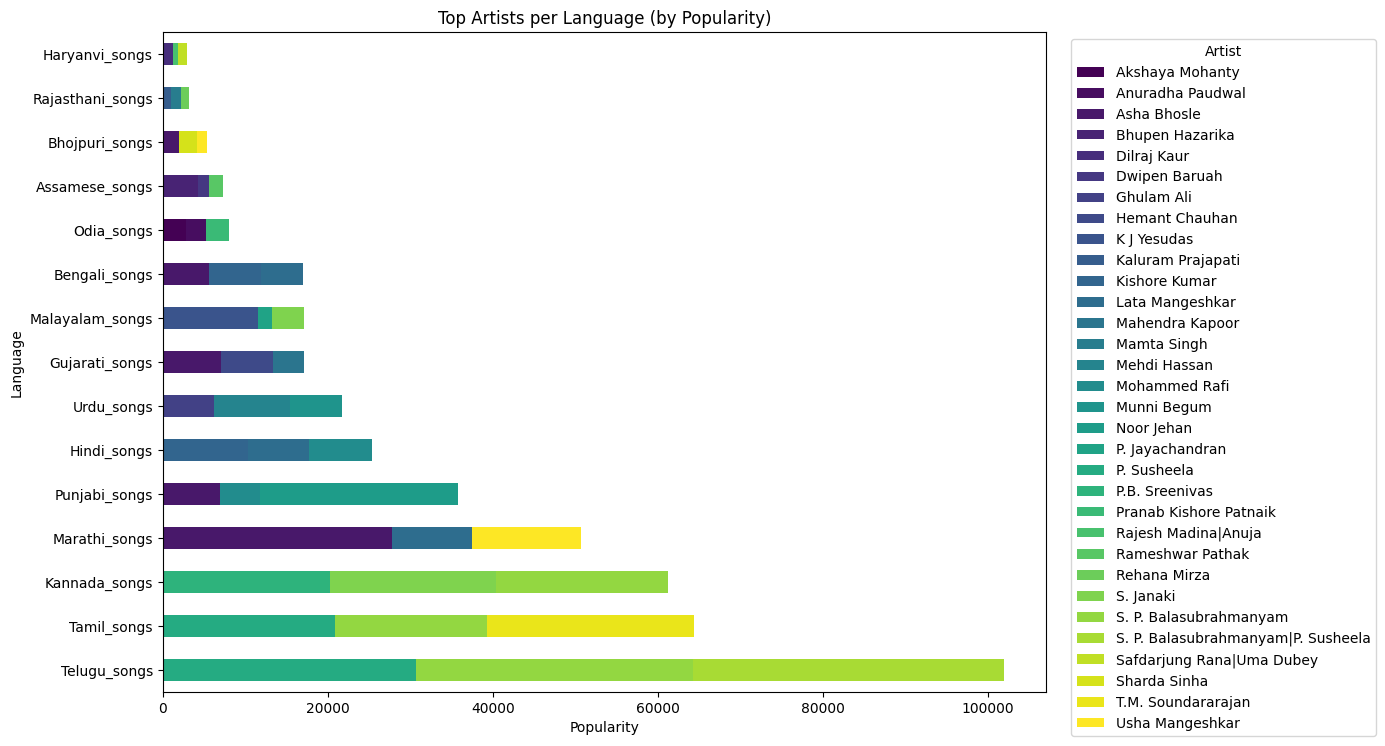

In [28]:
ax = pivot_df.plot(kind='barh', stacked=True, figsize=(14, 8), colormap='viridis')
ax.set_title('Top Artists per Language (by Popularity)')
ax.set_xlabel('Popularity')
ax.set_ylabel('Language')
ax.legend(title='Artist', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

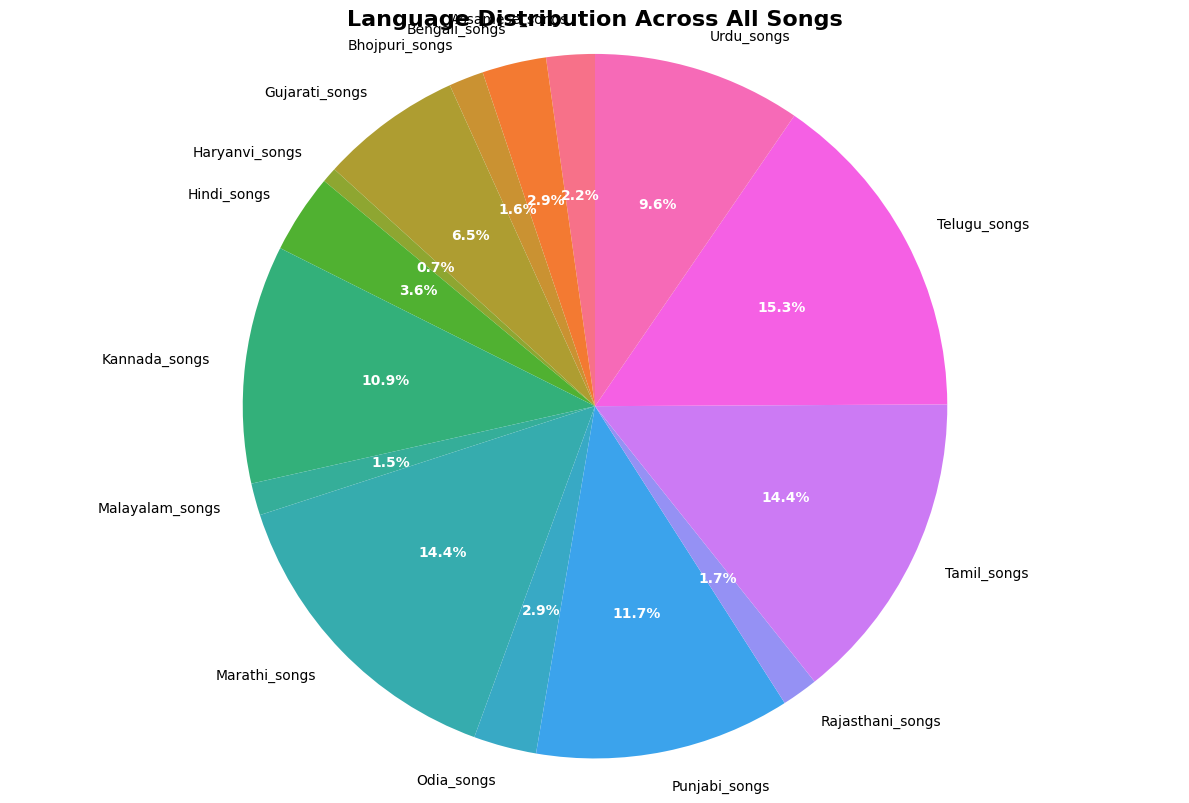


Language Distribution Summary:
--------------------------------------------------
Telugu_songs   :  4996 songs (15.35%)
Marathi_songs  :  4699 songs (14.43%)
Tamil_songs    :  4677 songs (14.37%)
Punjabi_songs  :  3818 songs (11.73%)
Kannada_songs  :  3559 songs (10.93%)
Urdu_songs     :  3116 songs ( 9.57%)
Gujarati_songs :  2115 songs ( 6.50%)
Hindi_songs    :  1184 songs ( 3.64%)
Bengali_songs  :   958 songs ( 2.94%)
Odia_songs     :   940 songs ( 2.89%)
Assamese_songs :   724 songs ( 2.22%)
Rajasthani_songs:   541 songs ( 1.66%)
Bhojpuri_songs :   519 songs ( 1.59%)
Malayalam_songs:   479 songs ( 1.47%)
Haryanvi_songs :   228 songs ( 0.70%)
--------------------------------------------------
Total          : 32553 songs


In [7]:
# Language Percentage Share over all songs
# Calculate song counts per language
language_counts = {}
for lang, df in language_dfs.items():
    language_counts[lang] = len(df)

# Create pie chart
plt.figure(figsize=(12, 8))
colors = sns.color_palette('husl', len(language_counts))

wedges, texts, autotexts = plt.pie(
    language_counts.values(), 
    labels=language_counts.keys(),
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 10}
)

# Make percentage text bold
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.title('Language Distribution Across All Songs', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nLanguage Distribution Summary:")
print("-" * 50)
total_songs = sum(language_counts.values())
for lang, count in sorted(language_counts.items(), key=lambda x: x[1], reverse=True):
    percentage = (count / total_songs) * 100
    print(f"{lang:15s}: {count:5d} songs ({percentage:5.2f}%)")
print("-" * 50)
print(f"{'Total':15s}: {total_songs:5d} songs")